In [104]:
import json

import pandas as pd

In [105]:
class IPerfTestResult:
    def __init__(self, json_data):
        self.start = Start(json_data.get('start', {}))
        self.intervals = [Interval(interval) for interval in json_data.get('intervals', [])]
        self.end = End(json_data.get('end', {}))
        self.server_output_json = ServerOutput(json_data.get('server_output_json', {}))


class Start:
    def __init__(self, start_data):
        self.connected = [Connected(conn) for conn in start_data.get('connected', [])]
        self.version = start_data.get('version')
        self.system_info = start_data.get('system_info')
        self.timestamp = Timestamp(start_data.get('timestamp', {}))
        self.connecting_to = ConnectingTo(start_data.get('connecting_to', {}))
        self.cookie = start_data.get('cookie')
        self.tcp_mss_default = start_data.get('tcp_mss_default')
        self.target_bitrate = start_data.get('target_bitrate')
        self.fq_rate = start_data.get('fq_rate')
        self.sock_bufsize = start_data.get('sock_bufsize')
        self.sndbuf_actual = start_data.get('sndbuf_actual')
        self.rcvbuf_actual = start_data.get('rcvbuf_actual')
        self.test_start = TestStart(start_data.get('test_start', {}))


class Connected:
    def __init__(self, conn_data):
        self.socket = conn_data.get('socket')
        self.local_host = conn_data.get('local_host')
        self.local_port = conn_data.get('local_port')
        self.remote_host = conn_data.get('remote_host')
        self.remote_port = conn_data.get('remote_port')


class Timestamp:
    def __init__(self, timestamp_data):
        self.time = timestamp_data.get('time')
        self.timesecs = timestamp_data.get('timesecs')


class ConnectingTo:
    def __init__(self, connecting_to_data):
        self.host = connecting_to_data.get('host')
        self.port = connecting_to_data.get('port')


class TestStart:
    def __init__(self, test_start_data):
        self.protocol = test_start_data.get('protocol')
        self.num_streams = test_start_data.get('num_streams')
        self.blksize = test_start_data.get('blksize')
        self.omit = test_start_data.get('omit')
        self.duration = test_start_data.get('duration')
        self.bytes = test_start_data.get('bytes')
        self.blocks = test_start_data.get('blocks')
        self.reverse = test_start_data.get('reverse')
        self.tos = test_start_data.get('tos')
        self.target_bitrate = test_start_data.get('target_bitrate')
        self.bidir = test_start_data.get('bidir')
        self.fqrate = test_start_data.get('fqrate')


class Interval:
    def __init__(self, interval_data):
        self.streams = [Stream(stream) for stream in interval_data.get('streams', [])]
        self.sum = Stream(interval_data.get('sum', {}))


class Stream:
    def __init__(self, stream_data):
        # Common fields
        self.socket = stream_data.get('socket')
        self.start = stream_data.get('start')
        self.end = stream_data.get('end')
        self.seconds = stream_data.get('seconds')
        self.bytes = stream_data.get('bytes')
        self.bits_per_second = stream_data.get('bits_per_second')
        self.omitted = stream_data.get('omitted')
        self.sender = stream_data.get('sender')

        # TCP specific fields
        self.retransmits = stream_data.get('retransmits')
        self.snd_cwnd = stream_data.get('snd_cwnd')
        self.snd_wnd = stream_data.get('snd_wnd')
        self.rtt = stream_data.get('rtt')
        self.rttvar = stream_data.get('rttvar')
        self.pmtu = stream_data.get('pmtu')

        # UDP specific fields
        self.packets = stream_data.get('packets')
        self.jitter_ms = stream_data.get('jitter_ms')
        self.lost_packets = stream_data.get('lost_packets')
        self.lost_percent = stream_data.get('lost_percent')


class End:
    def __init__(self, end_data):
        self.streams = [EndStream(stream) for stream in end_data.get('streams', [])]
        self.sum = EndSum(end_data.get('sum', {}))
        self.sum_sent = EndSum(end_data.get('sum_sent', {}))
        self.sum_received = EndSum(end_data.get('sum_received', {}))
        self.cpu_utilization_percent = CpuUtilization(end_data.get('cpu_utilization_percent', {}))


class EndStream:
    def __init__(self, stream_data):
        self.sender = stream_data.get('sender')
        self.receiver = stream_data.get('receiver')
        self.udp = UDP(stream_data.get('udp', {})) if 'udp' in stream_data else None


class UDP:
    def __init__(self, udp_data):
        self.socket = udp_data.get('socket')
        self.start = udp_data.get('start')
        self.end = udp_data.get('end')
        self.seconds = udp_data.get('seconds')
        self.bytes = udp_data.get('bytes')
        self.bits_per_second = udp_data.get('bits_per_second')
        self.jitter_ms = udp_data.get('jitter_ms')
        self.lost_packets = udp_data.get('lost_packets')
        self.packets = udp_data.get('packets')
        self.lost_percent = udp_data.get('lost_percent')
        self.out_of_order = udp_data.get('out_of_order')
        self.sender = udp_data.get('sender')


class EndSum:
    def __init__(self, sum_data):
        self.start = sum_data.get('start')
        self.end = sum_data.get('end')
        self.seconds = sum_data.get('seconds')
        self.bytes = sum_data.get('bytes')
        self.bits_per_second = sum_data.get('bits_per_second')
        self.jitter_ms = sum_data.get('jitter_ms')
        self.lost_packets = sum_data.get('lost_packets')
        self.packets = sum_data.get('packets')
        self.lost_percent = sum_data.get('lost_percent')
        self.sender = sum_data.get('sender')


class CpuUtilization:
    def __init__(self, cpu_data):
        self.host_total = cpu_data.get('host_total')
        self.host_user = cpu_data.get('host_user')
        self.host_system = cpu_data.get('host_system')
        self.remote_total = cpu_data.get('remote_total')
        self.remote_user = cpu_data.get('remote_user')
        self.remote_system = cpu_data.get('remote_system')


class ServerOutput:
    def __init__(self, server_data):
        self.start = Start(server_data.get('start', {}))
        self.intervals = [Interval(interval) for interval in server_data.get('intervals', [])]
        self.end = End(server_data.get('end', {}))

In [106]:
def parse_json(json_string):
    try:
        json_data = json.loads(json_string)
        return IPerfTestResult(json_data)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return None

In [107]:
def parse(path):
    return parse_json(open(path).read())    

In [108]:
res = parse("data/iperf_21-05-17_notbad")

In [109]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt


In [110]:
def load_to_df(path):
    res = parse(path)
    output = []
    
    for interval in res.intervals:
        for stream in interval.streams:
            if stream.sender:
                interval = f"{int(stream.start)}-{int(stream.end)}"
                output = output + [[interval, math.ceil(stream.bytes / 1024 / 1024), math.ceil(stream.bits_per_second / 1024 / 1024), stream.retransmits, 0, stream.]]
    
    df = pd.DataFrame(output, columns=["interval", "transfer", "bit_rate", "retransmits", "congestion_window", "packet_loss"])
    
    bit_rate_vs_interval = df.plot(x="interval", y="bit_rate")
    bit_rate_vs_interval.set_xlabel("Interval (s)")
    bit_rate_vs_interval.set_ylabel("Bit Rate (MBits/s)")
    bit_rate_vs_interval.set_title("Bit Rate Changes Over Time")
    
    plt.show()

    cwnd_vs_interval = df.plot(x="interval", y="congestion_window")
    cwnd_vs_interval.set_xlabel("Interval (s)")
    cwnd_vs_interval.set_ylabel("Congestion Window (MBytes)")
    cwnd_vs_interval.set_title("Congestion Window Changes Over Time")

    plt.show()
    
    return df

In [148]:
def load_batched_to_df(paths):
    output = []

    plt.style.use('default')

    i = 1
    
    for path in paths:
        r = parse(path)
        for interval in r.intervals:
            for stream in interval.streams:
                if not stream.sender:
                    interval = f"{int(stream.start)}-{int(stream.end)}"
                    output = output + [[i, interval, math.ceil(stream.bytes / 1024 / 1024), math.ceil(stream.bits_per_second / 1024 / 1024), stream.retransmits, np.nan if stream.snd_cwnd is None else math.ceil(stream.snd_cwnd / 1024 / 1024), stream.lost_percent, stream.packets - stream.lost_packets, stream.jitter_ms]]
                
        
        i += 1
                    
    df = pd.DataFrame(output, columns=["run", "interval", "transfer", "bit_rate", "retransmits", "congestion_window", "lost_percent", "received_packets", "jitter"])

    grouped = df.groupby("run")
    
    plt.figure(figsize=(15, 6))
    
    for name, group in grouped:
        plt.plot(group["interval"].values, group["jitter"].values, label=f"Run {name}")
        
    plt.xlabel("Interval (s)")
    plt.ylabel("Jitter (ms)")
    plt.title("Jitter Time Changes Over Time")

    plt.xticks(rotation=90)
    plt.legend()
    
    '''
    plt.show()

    plt.figure(figsize=(15, 6))    
    for name, group in grouped:
        plt.plot(group["interval"].values, group["congestion_window"].values, label=f"Run {name}")
    plt.xlabel("Interval (s)")
    plt.ylabel("Congestion Window (MBytes)")
    plt.title("Congestion Window Changes Over Time")

    plt.xticks(rotation=90)
    plt.legend()
        
    plt.show()
    '''

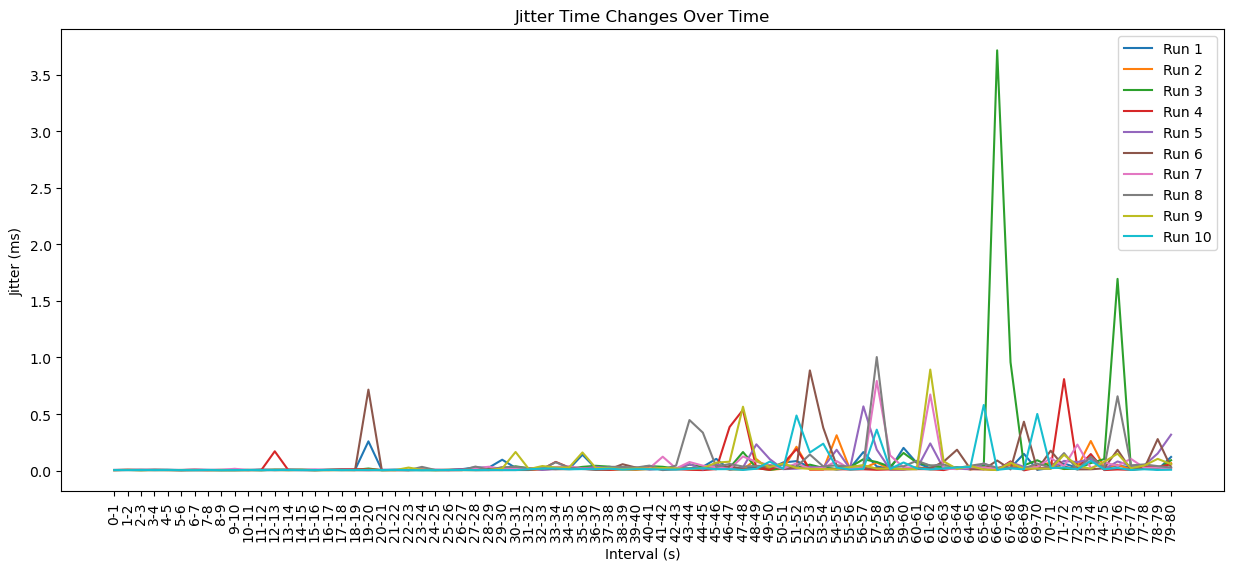

In [149]:
from pathlib import Path

load_batched_to_df(list(Path("data/udp").iterdir()))
    

In [64]:
def load_batch_df(paths):
    output = []

    i = 1

    for path in paths:
        for interval in res.intervals:
            for stream in interval.streams:
                if stream.sender:
                    interval = f"{int(stream.start)}-{int(stream.end)}"
                    output = output + [[i, interval, math.ceil(stream.bytes / 1024 / 1024), math.ceil(stream.bits_per_second / 1024 / 1024), stream.retransmits, math.ceil(stream.snd_cwnd / 1024 / 1024)]]

        i += 1

    df = pd.DataFrame(output, columns=["run", "interval", "transfer", "bit_rate", "retransmits", "congestion_window"])

    return df

In [101]:
plt.styles.available

AttributeError: module 'matplotlib.pyplot' has no attribute 'styles'

In [142]:
def load_batched_to_df_tcp(paths):
    output = []

    plt.style.use('default')

    i = 1
    
    for path in paths:
        r = parse(path)
        for interval in r.server_output_json.intervals:
            for stream in interval.streams:
                if stream.sender:
                    interval = f"{int(stream.start)}-{int(stream.end)}"
                    output = output + [[i, interval, math.ceil(stream.bytes / 1024 / 1024), math.ceil(stream.bits_per_second / 1024 / 1024), stream.rtt]]
                
        
        i += 1
                    
    df = pd.DataFrame(output, columns=["run", "interval", "transfer", "bit_rate", "rtt"])

    grouped = df.groupby("run")
    
    plt.figure(figsize=(15, 6))
    
    for name, group in grouped:
        plt.plot(group["interval"].values, group["rtt"].values, label=f"Run {name}")
        
    plt.xlabel("Interval (s)")
    plt.ylabel("Round Trip Time (ms)")
    plt.title("Round Trip Time Over Time")

    plt.xticks(rotation=90)
    plt.legend()
    
    '''
    plt.show()

    plt.figure(figsize=(15, 6))    
    for name, group in grouped:
        plt.plot(group["interval"].values, group["congestion_window"].values, label=f"Run {name}")
    plt.xlabel("Interval (s)")
    plt.ylabel("Congestion Window (MBytes)")
    plt.title("Congestion Window Changes Over Time")

    plt.xticks(rotation=90)
    plt.legend()
        
    plt.show()
    '''

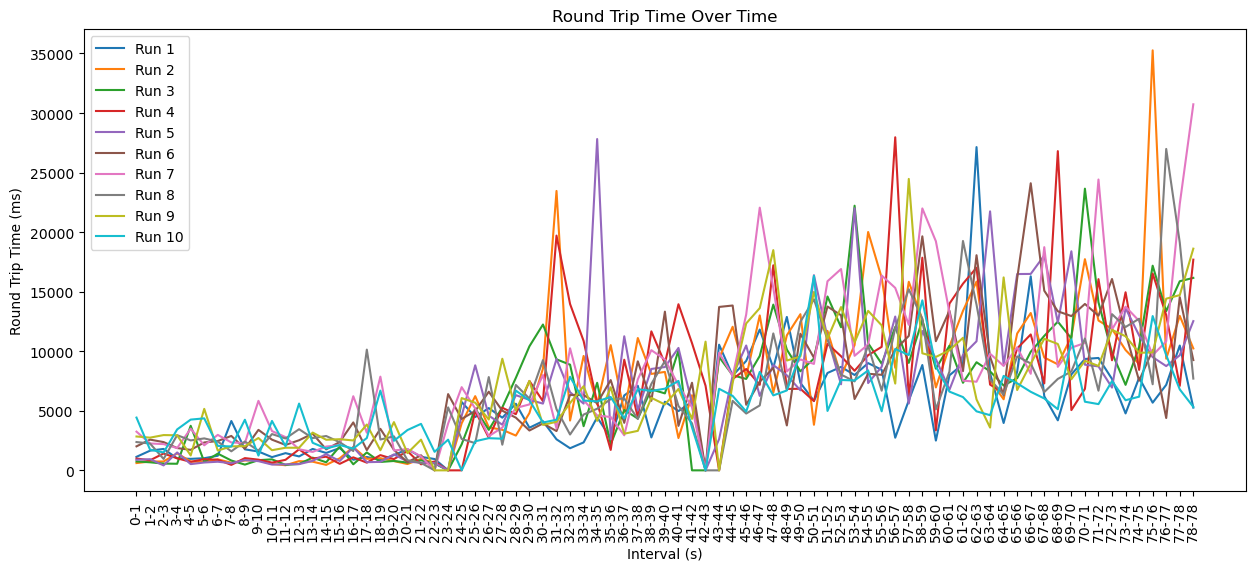

In [143]:
load_batched_to_df_tcp(list(Path("data/tcp").iterdir()))

In [156]:
def parse_start(path):
    parsed = json.loads(open(path).read())
    
    output = []
    
    for datum in parsed:
        output += [[datum["run"], datum["connected"], datum["wireguard_setup"], datum["transferred_pre_checkpoint"], datum["generated_checkpoint"], datum["transferred_checkpoint"], datum["restored_container"], datum["overall_migration"]]]
    
    return output

In [157]:
cold_starts = parse_start("data/migration/cold-start.json")

cold_starts

[[1,
  '0.0036593720000013263s',
  '0.2870018590000001s',
  '23.59223341900001s',
  '0.43746285900000714s',
  '0.005273384999995301s',
  '23.568504704999995s',
  '48.01436331399999s'],
 [2,
  '0.003973545000000911s',
  '0.32990912400000383s',
  '23.527291526000006s',
  '0.5417449010000013s',
  '0.00530919300000221s',
  '23.948965596000008s',
  '48.46751484s'],
 [3,
  '0.004398366999993186s',
  '0.3885120320000084s',
  '23.492767313s',
  '0.47023037799999656s',
  '0.004389962999994168s',
  '24.244656549s',
  '48.732004156s'],
 [4,
  '0.0036957630000031827s',
  '0.38870103s',
  '23.47279257000001s',
  '0.4601494000000059s',
  '0.005303014000006101s',
  '23.941907849999993s',
  '48.40682846000001s'],
 [5,
  '0.004522393000002012s',
  '0.4699773499999935s',
  '23.780115522999992s',
  '0.5350475560000092s',
  '0.004081514999995761s',
  '24.096621041999995s',
  '49.008947559999996s']]

In [196]:
warm_starts = parse_start("data/migration/warm-start.json")

warm_starts

[[1,
  '0.0037888110000210418s',
  '0.06550847799999815s',
  '0.24158111899998858s',
  '0.3951020650000032s',
  '0.00536046300001658s',
  '0.40651644700000134s',
  '~1.178250810999998s'],
 [2,
  '0.00539186299999983s',
  '0.06540456899998048s',
  '0.15671414800002026s',
  '0.38157516300000793s',
  '0.005468064999973876s',
  '0.46486890300002415s',
  '~1.1340039430000104s'],
 [3,
  '0.0034617419999847243s',
  '0.05225469199999111s',
  '0.14357859300000086s',
  '0.506537963999989s',
  '0.007749652000001106s',
  '0.393016235999994s',
  '~1.1737212269999873s'],
 [4,
  '0.003566563000021006s',
  '0.05638888999999381s',
  '0.23530849400000875s',
  '0.4087431400000128s',
  '0.005314171999998507s',
  '0.3850948159999916s',
  '~1.162872340000007s'],
 [5,
  '0.0052604429999973945s',
  '0.07806651999999303s',
  '0.1700847410000108s',
  '0.5216675040000212s',
  '0.005543170000009923s',
  '0.4109156209999867s',
  '~1.2512649829999987s'],
 [6,
  '0.003231472999999596s',
  '0.052648481999995056s',
  

In [218]:
df = pd.DataFrame(cold_starts, columns=["run", "connected", "wireguard_setup", "transferred_pre_checkpoint", "generated_checkpoint", "transferred_checkpoint", "restored_container", "overall_migration"])
df

,run,connected,wireguard_setup,transferred_pre_checkpoint,generated_checkpoint,transferred_checkpoint,restored_container,overall_migration
0,1,0.0036593720000013263s,0.2870018590000001s,23.59223341900001s,0.43746285900000714s,0.005273384999995301s,23.568504704999995s,48.01436331399999s
1,2,0.003973545000000911s,0.32990912400000383s,23.527291526000006s,0.5417449010000013s,0.00530919300000221s,23.948965596000008s,48.46751484s
2,3,0.004398366999993186s,0.3885120320000084s,23.492767313s,0.47023037799999656s,0.004389962999994168s,24.244656549s,48.732004156s
3,4,0.0036957630000031827s,0.38870103s,23.47279257000001s,0.4601494000000059s,0.005303014000006101s,23.941907849999993s,48.40682846000001s
4,5,0.004522393000002012s,0.4699773499999935s,23.780115522999992s,0.5350475560000092s,0.004081514999995761s,24.096621041999995s,49.008947559999996s


In [220]:
df["downtime"] = df["transferred_checkpoint"] + df["generated_checkpoint"] + df["restored_container"]

df["downtime"].mean()

24.4539295812

In [221]:
df["overall_migration"].mean()

48.525931666

In [219]:

df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x.str.replace("s", "").str.replace("~", "")).astype(float)
df.columns

Index(['run', 'connected', 'wireguard_setup', 'transferred_pre_checkpoint',
       'generated_checkpoint', 'transferred_checkpoint', 'restored_container',
       'overall_migration'],
      dtype='object')

In [199]:
df.columns = ["run", "1", "2", "3", "4", "5", "6", "7"]

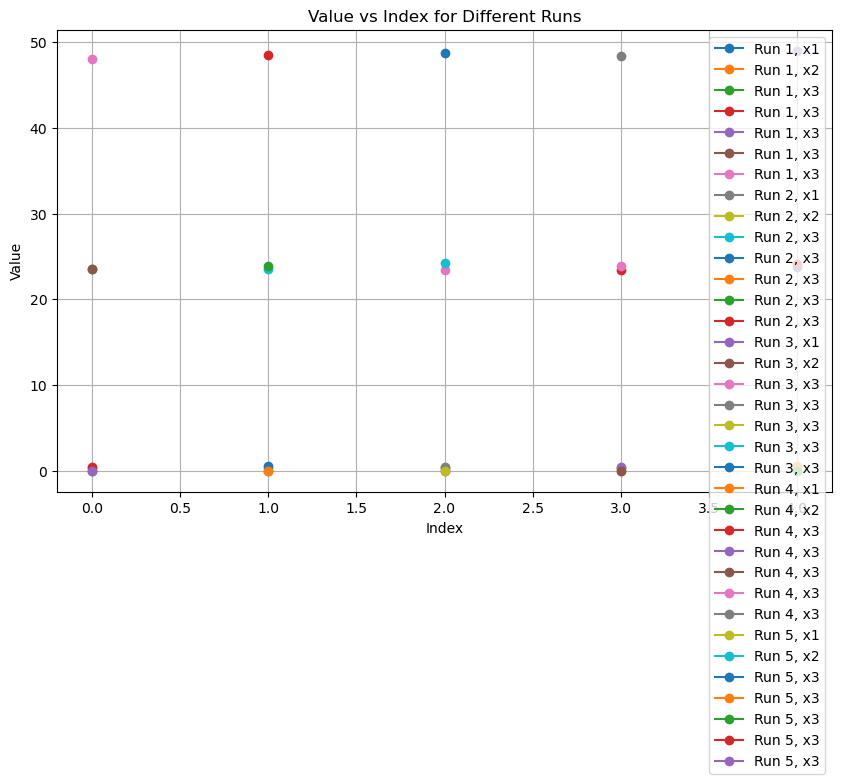

In [173]:
df

,1,2,3,4,5,6,7
0,0.003659,0.287002,23.592233,0.437463,0.005273,23.568505,48.014363
1,0.003974,0.329909,23.527292,0.541745,0.005309,23.948966,48.467515
2,0.004398,0.388512,23.492767,0.470230,0.004390,24.244657,48.732004
3,0.003696,0.388701,23.472793,0.460149,0.005303,23.941908,48.406828
4,0.004522,0.469977,23.780116,0.535048,0.004082,24.096621,49.008948


run
1    AxesSubplot(0.125,0.11;0.775x0.77)
2    AxesSubplot(0.125,0.11;0.775x0.77)
3    AxesSubplot(0.125,0.11;0.775x0.77)
4    AxesSubplot(0.125,0.11;0.775x0.77)
5    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

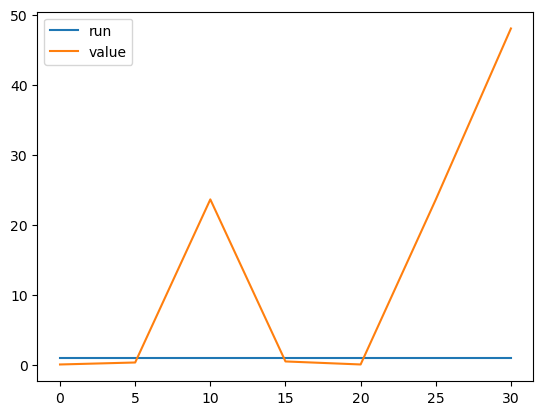

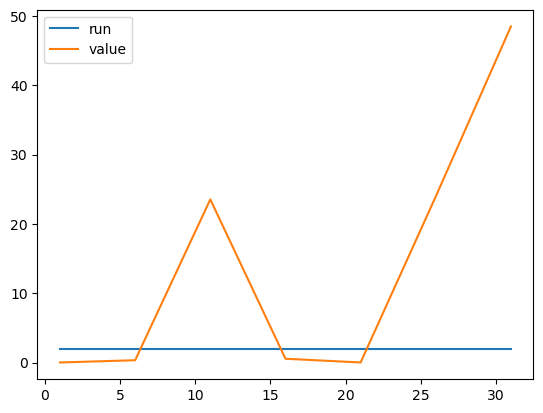

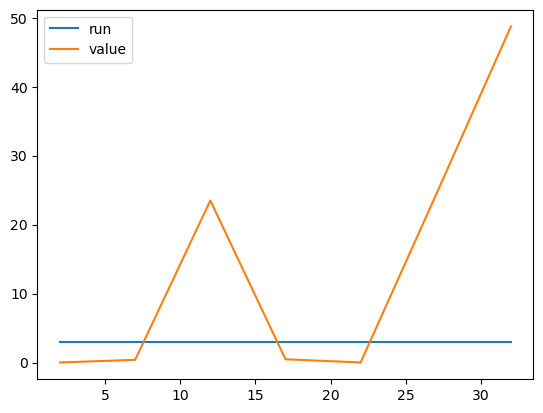

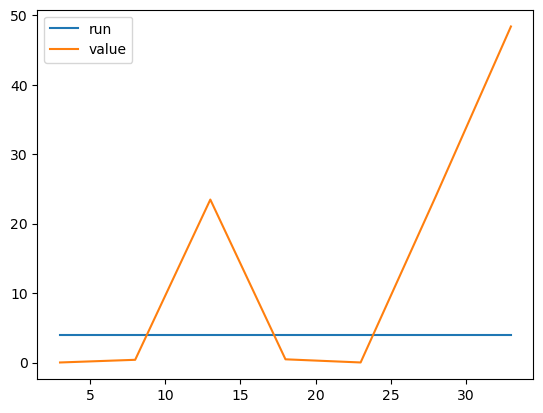

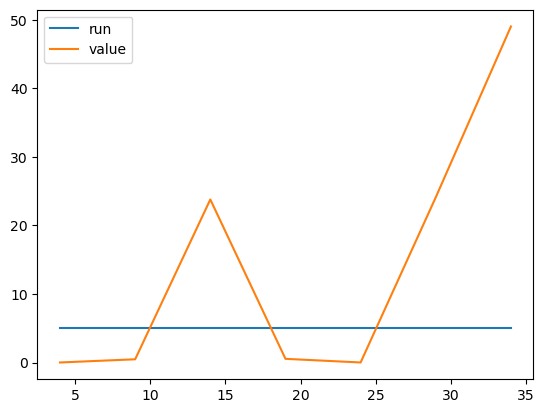

In [194]:
df.reset_index().melt(id_vars='run', value_vars=df.columns).groupby("run").plot()